In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the datasets
raw_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Byles, Rev. Thomas Roussel Davids",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dt = raw_data.copy()
dt.drop('PassengerId', axis=1, inplace=True)

### Analysing through visuals

<AxesSubplot:xlabel='Survived', ylabel='count'>

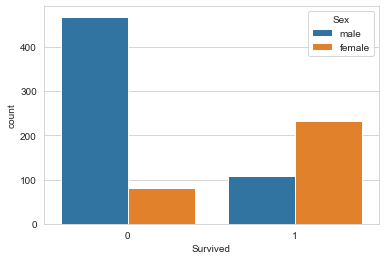

In [8]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=dt, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

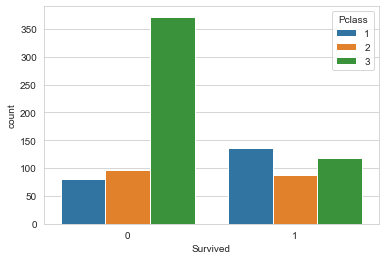

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=dt)

<AxesSubplot:xlabel='Parch', ylabel='count'>

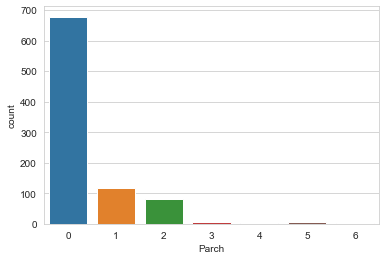

In [10]:
sns.countplot(x='Parch',data=dt)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

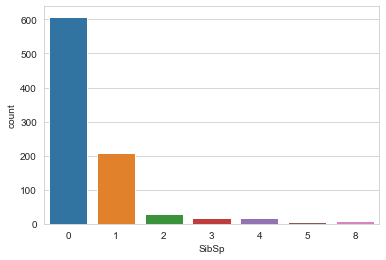

In [11]:
sns.countplot(x='SibSp',data=dt)

<AxesSubplot:xlabel='Family', ylabel='count'>

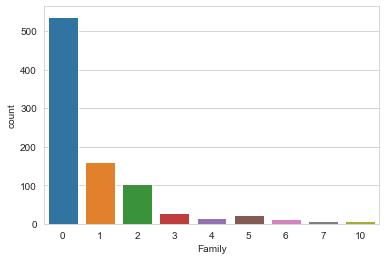

In [12]:
dt['Family'] = dt['SibSp'] + dt['Parch']
dt.drop(['SibSp','Parch'],axis = 1,inplace = True)
sns.countplot(x='Family',data=dt)

<AxesSubplot:xlabel='Survived', ylabel='count'>

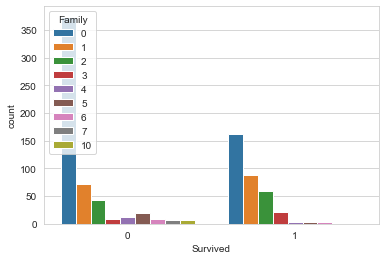

In [13]:
sns.countplot(x='Survived',hue ='Family', data=dt)

In [14]:
dt['Family'].replace(dt[dt['Family']>3]['Family'].tolist(), value='bigf', inplace=True)

In [15]:
def know_your_data(dataset):
    return pd.DataFrame({'Column_name':dataset.columns,
                         'data_type': dataset.dtypes.values,
                         'uniques': [dataset[i].unique() for i in dataset.columns],
                         'n_unique': [dataset[i].nunique() for i in dataset.columns],
                         'n_null': [dataset[i].isna().sum() for i in dataset.columns]})

In [16]:
know_your_data(dt)

,Column_name,data_type,uniques,n_unique,n_null
0,Survived,int64,"[0, 1]",2,0
1,Pclass,int64,"[3, 1, 2]",3,0
2,Name,object,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,0
3,Sex,object,"[male, female]",2,0
4,Age,float64,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88,177
5,Ticket,object,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,0
6,Fare,float64,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,0
7,Cabin,object,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",147,687
8,Embarked,object,"[S, C, Q, nan]",3,2
9,Family,object,"[1, 0, bigf, 2, 3]",5,0


In [17]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [18]:
dt['Title'] = dt['Name'].apply(get_title)

<AxesSubplot:xlabel='Title', ylabel='count'>

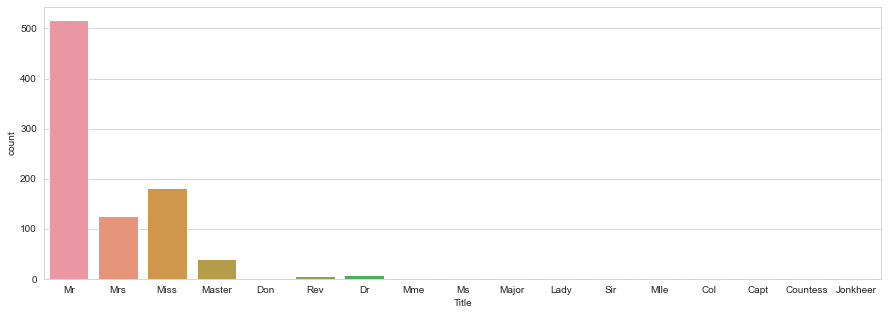

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='Title', data=dt)

In [20]:
dt['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
for i in range(len(dt)):
    if dt['Title'][i] in (['Mr', 'Mrs', 'Miss', 'Master']):
        pass
    else:
        dt['Title'][i] = 'Rare_title'

In [22]:
#dt[~dt['Cabin'].isnull()][dt[~dt['Cabin'].isnull()]['Pclass']==1]

In [23]:
dt['Cabin'] = 1*~dt['Cabin'].isnull()

In [24]:
dt.drop(['Ticket','Name'],axis = 1,inplace=True)
dt['Embarked'].fillna(value = 'S', inplace=True)

In [25]:
dt['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:xlabel='Age', ylabel='Density'>

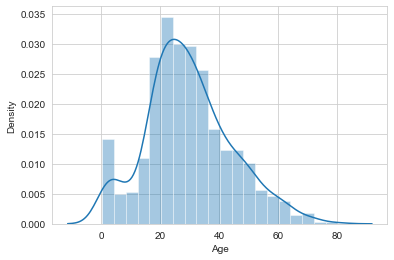

In [26]:
sns.distplot(dt['Age'])

In [27]:
age_avg = dt['Age'].mean() # mean of age in train data
age_std = dt['Age'].std() # std of age in train data
age_null_count = dt['Age'].isnull().sum()

dt['Age'][np.isnan(dt['Age'])] = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

###  Work on test_data

In [28]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
tt = test_data.copy()
tt.drop('PassengerId', axis=1, inplace=True)

In [30]:
tt.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [31]:
tt['Family'] = tt['SibSp'] + tt['Parch']
tt.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [32]:
tt['Family'].replace(tt[tt['Family']>3]['Family'].tolist(), value='bigf', inplace=True)

In [33]:
tt['Title'] = tt['Name'].apply(get_title)

In [34]:
for i in range(len(tt)):
    if tt['Title'][i] in (['Mr', 'Mrs', 'Miss', 'Master']):
        pass
    else:
        tt['Title'][i] = 'Rare_title'

In [35]:
tt['Cabin'] = 1*~tt['Cabin'].isnull()

In [36]:
tt.drop(['Ticket','Name'],axis = 1,inplace=True)
tt['Embarked'].fillna(value = 'S', inplace=True)

In [37]:
age_null_count = tt['Age'].isnull().sum()

tt['Age'][np.isnan(tt['Age'])] = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

In [38]:
tt['Fare'].fillna(dt['Fare'].mean(), inplace=True)

In [39]:
tt['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare_title'], dtype=object)

In [40]:
know_your_data(tt)

,Column_name,data_type,uniques,n_unique,n_null
0,Pclass,int64,"[3, 2, 1]",3,0
1,Sex,object,"[male, female]",2,0
2,Age,float64,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26....",79,0
3,Fare,float64,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ...",170,0
4,Cabin,int32,"[0, 1]",2,0
5,Embarked,object,"[Q, S, C]",3,0
6,Family,object,"[0, 1, 2, bigf, 3]",5,0
7,Title,object,"[Mr, Mrs, Miss, Master, Rare_title]",5,0


### Get Data Ready

In [41]:
X = dt.drop(['Survived'], axis=1)
y = dt['Survived'].copy()

In [42]:
for var in ['Pclass', 'Cabin']:
    X[var] = list(map(str, dt[var]))
    tt[var] = list(map(str, tt[var]))

In [43]:
X = pd.get_dummies(X)

In [44]:
tt = pd.get_dummies(tt)

### Train-Test-Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=32)

### Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training, Predicting and AccuracyScore

In [47]:
# logistic
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression(random_state = 0)
lc.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = lc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[73 12]
 [13 36]]


0.8134328358208955

In [48]:
# random_forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[72 13]
 [15 34]]


0.7910447761194029

In [49]:
# kernel SVM
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[81  4]
 [16 33]]


0.8507462686567164

In [50]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgbc = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

xgbc.fit(X_train, Y_train)

Y_pred = xgbc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[16:38:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[75 10]
 [11 38]]


0.8432835820895522

In [51]:
X_final = tt.copy()

In [52]:
X_final = sc.transform(X_final)

Y_pred_lc = lc.predict(X_final)
Y_pred_svc = svc.predict(X_final)
Y_pred_xgbc = xgbc.predict(X_final)

In [53]:
import statistics as st

Y_pred_final = []
for i in range(len(X_final)):
    Y_pred_final.append(st.mode([Y_pred_lc[i], Y_pred_svc[i], Y_pred_xgbc[i]]))

In [54]:
final = pd.DataFrame()
final['PassengerId'] = test_data['PassengerId']
final['Survived'] = Y_pred_final

In [55]:
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
#final.to_csv('Titanic_output.csv',index=False)